Hi everyone! In this notebook, i will make an exploratory analysis data of one month of subway traffic in Buenos Aires-Argentina, using matplotlib, plotly, and pandas.

In [2]:
#First we wll import the Necessary librarys to analyze the data
import numpy as np 
import pandas as pd
import matplotlib as mt
import plotly.express as pl

In [5]:
Location = 'molinetes062021.csv'
PassData = pd.read_csv(Location,encoding='iso-8859-1')

In [6]:
PassData.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,1/6/2021,05:30:00,05:45:00,LineaA,LineaA_Miserere_Q_NE_Turn01,Plaza Miserere,0.0,0.0,3.0,3.0
1,1/6/2021,05:30:00,05:45:00,LineaA,LineaA_Acoyte_S_Turn01,Acoyte,0.0,0.0,1.0,1.0
2,1/6/2021,05:30:00,05:45:00,LineaA,LineaA_Lima_S_Turn02,Lima,0.0,0.0,2.0,2.0
3,1/6/2021,05:30:00,05:45:00,LineaA,LineaA_Lima_S_Turn03,Lima,0.0,0.0,1.0,1.0
4,1/6/2021,05:30:00,05:45:00,LineaB,LineaB_Pellegrini_E_Turn07,Carlos Pellegrini,1.0,0.0,0.0,1.0


In [17]:
PassData.LINEA.unique()

array(['LineaA', 'LineaB', 'LineaC', 'LineaE', 'LineaD', 'LineaH'],
      dtype=object)

In [29]:
#First we have to pre-process the Data for visualization
PassData=PassData.dropna()
#Second, to use the same color map in all the Notebook, and other dictionarys, we will define a color map to be used specific with subway lines
color_Map={"LineaA": "lightskyblue",
                "LineaB": "red",
                "LineaC": "blue",
                "LineaD": "green",
                "LineaE": "purple",
                "LineaH": "yellow"} #Those are the real colors that identifies each subway line in Buenos Aires.
dlabels={
                     "LINEA": "LINE",
                     "pax_TOTAL": "Total passengers",
                     "ESTACION": "Station",
                      "DESDE":"Day hour"
                 }                

In [20]:
PassData.dtypes

FECHA               object
DESDE               object
HASTA               object
LINEA               object
MOLINETE            object
ESTACION            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
pax_TOTAL          float64
dtype: object

In [30]:
#At first we could use the time frame to visualize witch entrance of the subway have more traffic.
fig = pl.scatter(data_frame=PassData,y="pax_TOTAL",x='DESDE',
	         size="pax_TOTAL", color="LINEA", color_discrete_map=color_Map,
                 hover_name="LINEA",labels=dlabels)
fig.show()

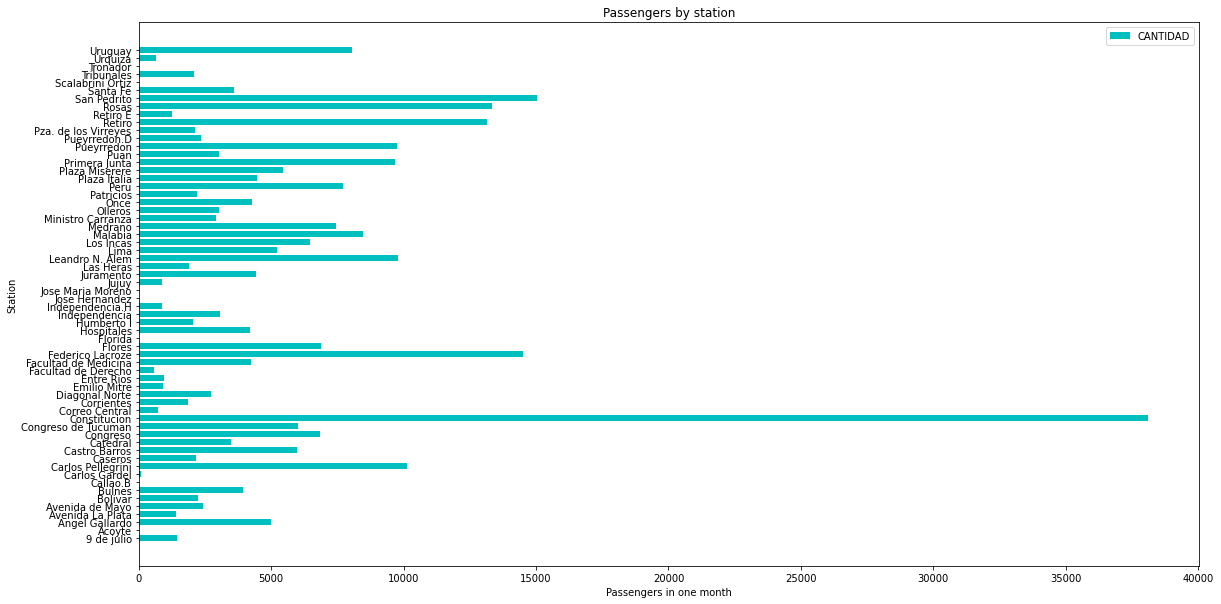

In [12]:
#Lets analyze wich stations are the most crowded.
#First we have to group the data.

StationData = PassData.groupby(by=['ESTACION']).sum('pax_TOTAL')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = StationData['pax_TOTAL'].index
y = StationData['pax_TOTAL']

StationBarChart = figure(num=None, figsize=(19, 10))

y_pos=np.arange(len(x))

# Input bar values
# Define the bar styles with width, color, and legend labels
plt.barh(y_pos + 0, y, color = 'c', label='CANTIDAD')

# Define X-axis labels
plt.yticks(y_pos, x)
plt.legend(loc='best')
plt.ylabel('Station')
plt.xlabel('Passengers in one month')
plt.title("Passengers by station")

plt.show()




Some stations where closed by COVID19 restrictions. 

In the previuos graph, we could conclude that the station "Constitución" is by far, the most concurred stations of all. An importan observation in this analysis is to address if the distribution of passengers across lines and stations is equal, besides the 'Constitución' Station. Let's plot using the lines as a colour difference to see this.

In [32]:
fig = pl.bar(data_frame=PassData,y="pax_TOTAL",x='ESTACION', color="LINEA",hover_name="LINEA",color_discrete_map=color_Map,labels=dlabels)
fig.show()

With this Graph, we could conclude that the "C" line of the subway, recieves most of their passengers in the "Constitucion" station. Meanwhile, the "B" Line, and the A line, have a more distributed traffic. 

In [33]:
#df = PassData.query("LINEA in ['LineaA', 'LineaB']")
TimeData = PassData.groupby(by=['DESDE','LINEA']).sum()
Cols = TimeData.index.to_frame('LINEA')
f = pd.concat([TimeData, Cols],axis=1,join='inner')
fig = pl.line(f, x='DESDE', y="pax_TOTAL", color="LINEA",color_discrete_map=color_Map,labels=dlabels)

fig.update_traces(textposition="bottom right")
fig.show()

In the above graph, we could see that the "B" Line is the most crowded in almost all day. A Question we could Ask, it's how is the distribution of passengers among each line. We could see that in a common Pie Chart.

In [27]:
LineData = PassData.groupby(by=['LINEA']).sum()
Cols = LineData.index.to_frame('LINEA')
f = pd.concat([LineData, Cols],axis=1,join='inner')
fig = pl.pie(f, values="pax_TOTAL", names='LINEA',color='LINEA',color_discrete_map=color_Map,labels=dlabels)
fig.show()

In [39]:
#Finnally we could see in a polar graph the distribution
fig = pl.bar_polar(f, r="pax_TOTAL", theta="DESDE", color="LINEA",
                   color_discrete_map=color_Map,
                   title="Day Time Distribution"
                  )
fig.show()